$\textbf{Question 1}$

Nous avons le système d'équations suivant:

$$\left(\frac{\partial^2}{\partial z^2}-k^2\right)w = -k^2 c\\
\frac{\partial c}{\partial t}-\frac{1}{Ra}\left(\frac{\partial^2}{\partial z^2}-k^2\right)c=-\frac{\partial C_0}{\partial z}w,$$

avec $C_0(z,t)=1-{\rm erf}(z\sqrt{\frac{Ra}{4t}}).$

Effectuons le changement de variables:

$$\xi =z\sqrt{\frac{Ra}{4t}}.$$

Les fonctions $w$ et $c$ dépendront alors des variables $\xi$ et $t$, que nous considérons à présent indépendantes. Pour $w$, cela donne:

$$w=w(z,t)=w(z(\xi ,t),t)\Rightarrow \frac{\partial w}{\partial \xi }=\frac{\partial w}{\partial z}\frac{\partial z}{\partial \xi }+\frac{\partial w}{\partial t}\frac{\partial t}{\partial \xi }=\frac{\partial w}{\partial z}\frac{\partial z}{\partial \xi }.$$

Donc
$$\frac{\partial w}{\partial z}=\frac{1}{\frac{\partial z}{\partial \xi }}\frac{\partial w}{\partial \xi}.$$

Nous faisons de même pour évaluer la dérivée seconde de $w$ par rapport à $\xi$, ce qui donne:
    
$$\frac{\partial^2 w}{\partial z^2}=\left (\frac{1}{\frac{\partial z}{\partial \xi }}  \right )^2\frac{\partial^2 w}{\partial \xi^2}=\frac{Ra}{4t}\frac{\partial^2 w}{\partial \xi ^2}.$$

Pour la fonction $c$ nous avons:

$$c=c(z,t)=c(z(\xi ,t),t)=\widetilde{c}(\xi ,t)\Rightarrow \frac{\partial \widetilde{c}}{\partial t}=\frac{\partial c}{\partial z}\frac{\partial z}{\partial t}+\frac{\partial c}{\partial t}\frac{\partial t}{\partial t}=\left (\frac{1}{\frac{\partial z}{\partial \xi }}\frac{\partial \widetilde{c}}{\partial \xi }  \right )\frac{\partial z}{\partial t}+\frac{\partial c}{\partial t}=\frac{\xi }{2t}\frac{\partial c}{\partial \xi }+\frac{\partial c}{\partial t}$$

$$\Rightarrow \frac{\partial c}{\partial t}=\frac{\partial \widetilde{c}}{\partial t}-\frac{\xi }{2t}\frac{\partial \widetilde{c}}{\partial \xi }.$$

Enfin, la première équation devient donc:

$$\left (\frac{Ra}{4t}\frac{\partial^2 }{\partial \xi ^2}-k^2  \right )w=-k^2c, \quad (1)$$

et la deuxième devient:
    
$$\frac{\partial \widetilde{c}}{\partial t}-\frac{\xi }{2t}\frac{\partial \widetilde{c}}{\partial \xi }-\frac{1}{Ra}\left (\frac{Ra}{4t}\frac{\partial^2 }{\partial \xi ^2}-k^2  \right )\widetilde{c}=-\frac{\partial C_0}{\partial z}w=\sqrt{\frac{Ra}{\pi t}}e^{-\xi ^2}w.$$

En posant $c=\widetilde{c}$, et en réarrangeant les termes, nous obtenons l'expression voulue:

$$\frac{\partial c}{\partial t}-\frac{1}{t}\left (\frac{1}{4}\frac{\partial^2 }{\partial \xi ^2}+\frac{\xi }{2}\frac{\partial }{\partial \xi }-\frac{k^2t}{Ra}  \right )c=-\frac{\partial C_0}{\partial z}w=\sqrt{\frac{Ra}{\pi t}}e^{-\xi ^2}w. \quad (2)$$

$\textbf{Question 2}$

Afin de réécrire les opérateurs de dérivée première et seconde, nous allons utiliser les différences finies centrées d'ordre 2.

$$\frac{\partial^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^{2}}+\mathcal O\left ( 2 \right ),$$

$$\frac{\partial u}{\partial x}=\frac{u_{i+1}-u_{i-1}}{2\Delta x}+\mathcal O\left ( 2 \right ),$$

avec $$i = 0,1,...100.$$

Puisque nous connaissons les conditions initiales, nous ne devons pas les recalculer en utilisant les différences finies. Dès lors, en $i=0$ et $i=100$, nous devons obtenir $0$, donc la première et dernière ligne des matrices associées à ces opérateurs différentiels valent $0$.

De plus, remarquons que pour la matrice des dérivées premières, nous avons

$$\left ( \frac{\partial u}{\partial x} \right )_{i=1}=\frac{u_{2}-u_{0}}{2\Delta x}+\mathcal O\left ( 2 \right )$$

et $$u_{0}=0,$$ par les conditions initiales.

Donc la première colonne de la matrice vaut 0. La dernière colonne de la matrice vaut aussi 0 en utilisant le même argument.

Les opérateurs "dérivée seconde" et "dérivée première" se réduisent alors à des matrices 99 x 99.

Enfin, D1, l'opérateur dérivée première, et D2, l'opérateur dérivée seconde sont définis de la manière suivante:

In [2]:
import numpy
Matrix1=numpy.zeros((99,99)) #On définit une matrice remplie de 0
for i in range(0,99):
    if (i!=0) and (i!=99):
        Matrix1[i-1][i]=1    #On remplit les positions "i+1" de chaque ligne avec 1
        Matrix1[i][i-1]=-1   #On remplit les positin "i+1" de chaque colonne avec -1
print(Matrix1)

[[ 0.  1.  0. ...  0.  0.  0.]
 [-1.  0.  1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ... -1.  0.  1.]
 [ 0.  0.  0. ...  0. -1.  0.]]


In [44]:
Matrix2=numpy.zeros((99,99))  #On définit une matrice remplie de 0
for i in range(0,99):          
    Matrix2[i][i]=-2         #On remplit la diagonale avec -2
    if (i!=0) and (i!=99):
        Matrix2[i-1][i]=1    #On remplit les positions "i+1" de chaque ligne avec 1
        Matrix2[i][i-1]=1    #On remplit les positions "i+1" de chaque colonne avec 1
print(Matrix2)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


Nous avons donc:
    
$$D1=\left ( \frac{1}{2\Delta } \right )*Matrix1,$$
$$D2=\left ( \frac{1}{\Delta^{2} } \right )*Matrix2.$$

avec $\Delta$ correpondant au pas avec lequel nous nous déplaçons.

Nous obtenons les opérateurs suivants:

$$L_{i,j}=\left ( \frac{Ra}{4t}D2-k^{2} \right )_{i,j}, \quad (3)$$
et $$M_{i,j}=\frac{1}{t}\left ( \frac{1}{4}D2+\frac{\xi }{2}D1-\frac{k^{2}t}{Ra} \right )_{i,j}. \quad (4)$$

$\textbf{Question 3}$

Soit 
$$f(\xi )=e^{-\xi ^2}h(\xi ),$$

où $h$ est un polynôme d'Hermite, solution de l'équation d'Hermite 

$${h}''-2\xi h=-2\lambda h.$$

Nous devons à présent déterminer les valeurs propres de l'opérateur

$$H=\frac{1}{4}\frac{\partial^2 }{\partial \xi ^2}+\frac{\xi }{2}\frac{\partial }{\partial \xi }, \quad (5)$$

c'est à dire déterminer $\alpha $ tel que $Hf=\alpha f.$

Cela nous donne:
    
$$\frac{\partial f}{\partial \xi }=-2\xi e^{-\xi ^2}h+e^{-\xi ^2}h',$$

$$\frac{\partial^2 f}{\partial \xi ^2}=-2\left ( e^{-\xi ^2}h + \xi (e^{-\xi ^2}h)'\right )-2\xi e^{-\xi ^2}h'+e^{-\xi ^2}h''=e^{-\xi ^2}\left ( -2h+4\xi ^2h-4\xi h'+h'' \right ).$$

Donc                                                                                                                                                

$$Hf=\frac{1}{4}e^{-\xi ^2}\left ( -2h+4\xi ^2h-4\xi h'+h'' \right )+\frac{\xi }{2}\left ( -2\xi e^{-\xi ^2}h+e^{-\xi ^2}h'  \right )=e^{-\xi ^2}\left ( -\frac{h}{2}-\xi h'+ \frac{\xi h'}{2}+\frac{h''}{4}\right )$$

$$=e^{-\xi ^2}\left ( -\frac{h}{2}-\frac{\lambda h}{2}\right )=f\left (\frac{-1}{2}  \right )\left ( 1+\lambda  \right ).$$ 
                                                                                                                                                
Nous obtenons $\alpha = \left (\frac{-1}{2}  \right )\left ( 1+\lambda  \right ).$      
                                                                                                                                                
Si $f(\xi=0)=f(\xi=\infty )=0$, cela implique que
                                                                                                                                                
$$h(0)=0.$$
                                                                                                                                                
Pour que les polynômes d'Hermite s'annulent en $x=0$, il faut que $\lambda$ soit impair, i.e $\lambda=2m+1, m \in \mathbb{N}.$ 
                                                                                                                                                
$$\Rightarrow \alpha =\frac{-1}{2}\left ( 1+2m+1 \right )=-(m+1), m \in \mathbb{N}$$
                                                                                                                                                
Les valeurs admissibles pour $\alpha$ sont donc 

$$\alpha = -1, -2, -3,...$$                                                                                                                                                                                                                                                                                              
                                                                                                                                                

$\textbf{Question 4}$

Nous devons trouver les valeurs propres de l'opérateur
$$H=\frac{1}{4}D2+\frac{\xi }{2}D1$$

Avec $$\xi=i\Delta,$$
$$i=0,...,100,$$
$$\Delta=L/(N-1),$$
$$L=5,$$
$$N=101.$$

In [43]:
import copy
Matrix3=numpy.zeros((99,99))     #On définit une matrice remplie de 0.
j=1
for i in range(0,99):
    if (i!=0) and (i!=99):
        Matrix3[i-1][i]=1*j       #On définit la matrice "xi*Matrix1", avec xi=m*Delta.
        Matrix3[i][i-1]=-1*(j+1)
        j=j+1
Delta=(5/100)                    #On définit Delta
H=numpy.add((1/(4*(Delta**2)))*Matrix2,(1/4)*Matrix3)  #On définis l'opérateur H, en sommant les matrices "Matrix" et "Matrix3".
x=numpy.linalg.eig(H)  #On calcule les valeurs propres et vecteurs propres grâce à numpy.linalg.eig.
maxvalues=[]              #On définit une liste vide
g=copy.deepcopy(x[0])     #On copie les valeurs propres vers une variable g
for i in range(0,5):
    q=numpy.amax(g)        #On trouve la valeur propre maximale 
    p=numpy.argmax(g)      #On trouve l'index qui correspond à cette valeur propre maximale
    g=numpy.delete(g,p,0)  #On enlève la valeur propre maximale de la liste g
    maxvalues.append(q)    #On stocke la valeur propre maximale dans notre liste
print('Les 5 plus grandes valeurs propres de H sont:')
print(maxvalues)

Les 5 plus grandes valeurs propres de H sont:
[-1.0000000013657317, -2.000000458986312, -3.0000377699668666, -4.0011531743049344, -5.015015849585255]


Ces valeurs sont bien les valeurs trouvées à la question précédente.

$\textbf{Question 5}$

Grâce aux équations $(3)$ et $(4)$, nous pouvons réécrire $(1)$ comme $L_{ij}w=-k^{2}c\Rightarrow w=-k^2(L_{ij}^{-1}c).$
On injecte cela dans l'équation $(2)$:

$$\frac{\partial c_{i}}{\partial t}=\left ( -k^2\sqrt{\frac{Ra}{4t}}e^{-(i\Delta )^2}(L_{ij})^{-1} +M_{ij}\right )c_{j}=R_{ij}c_{j}, \quad (6)$$

où nous avons utilisé le fait que $\xi_{i}=i\Delta.$

Nous allons à présent résoudre cette équation grâce à l'algorithme RK4.

In [ ]:
import math
ci = numpy.load("init_cond_c.npy")  #On charge la condition initiale aléatoire
Ra=500
k=0.1
t=10**(-5)
step=10**(-8)
def f(t,c):                   #On définit la fonction à résoudre par RK4
    L=((Ra/(4*t))*(1/Delta**2)*Matrix2)-(k**2)   #On définit l'opérateur L qui varie dans le temps
    Inv=numpy.linalg.inv(L)           #On inverse L
    M=(1/t)*(H-(((k**2)*t)/Ra))     #On définit l'opérateur M qui varie dans le temps
    for i in range(0,99):
        Inv[i]=((-k**2)*math.sqrt(Ra/(math.pi*t))*math.exp(-(i*Delta)**2)*Inv[i])+M[i]    #On modifie chaque ligne de l'opérateur Inv (afin d'obtenir l'opérateur R ci-dessus)
    return(numpy.dot(Inv,c))
while t<10**(-4):            #On résout grâce à RK4
    k1=f(t,ci)
    k2=f(t+(step/2),ci+((step/2)*k1))
    k3=f(t+(step/2),ci+((step/2)*k2))
    k4=f(t+step,ci+(step*k3))
    t=t+step
    t=round(t,10)
    ci=ci+((step/6)*(k1+(2*k2)+(2*k3)+k4))
print(ci)

Calculons la valeur maximale de la solution en $t=10^{-4}$:

In [40]:
q=numpy.amax(ci)
print(q)

0.11687172609425604


Enfin, nous représentons sur un graphique la condition initiale $c_i(\xi_m,t_0)$ et la solution à l'instant $t=10^{-4}.$

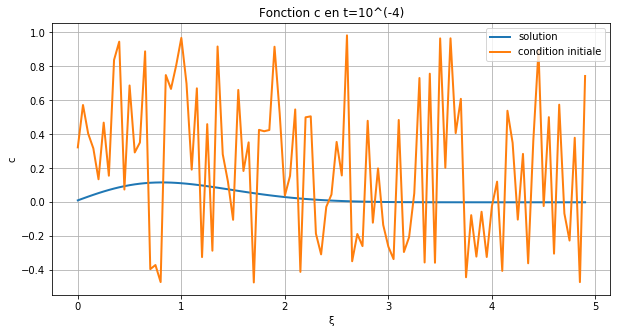

In [42]:
u=[]
for i in range(0,99):                 #On génère une liste contenant les valeurs de ξ
    u.append(i*Delta)
c0=numpy.load("init_cond_c.npy")
from matplotlib import pyplot
pyplot.figure(figsize=(10.0, 5.0))
pyplot.title('Fonction c en t=10^(-4)')
pyplot.xlabel('ξ')
pyplot.ylabel('c')
pyplot.grid()
pyplot.plot(u, ci, color='C0', linestyle='-', linewidth=2);   #On trace la courbe correspondant à la solution en t=10^(-4)
pyplot.plot(u, c0, color='C1', linestyle='-', linewidth=2);   #On trace la courbe correspondant à la condition iniciale
pyplot.gca().legend(('solution','condition initiale'))        #On ajoute la légende

Afin de résoudre le problème d'advection-diffusion dans un milieu poreux, nous avons effectué un changement de variable afin d'obtenir les équations $(1)$ et $(2)$, qui ont été utilisées pour aboutir à l'équation $(6)$, une équation différentielle contenant uniquement $c$. Celle-ci a ensuite été résolue grâce à l'algorithme RK4, et la solution a été représentée sous forme graphique à la question 5. 
Après avoir tracé le graphique de c et comparé la condition initiale donnée et la solution au temps $t=10^{-4},$ nous observons que la condition initiale pour c fluctue fortement au temps initial $t=10^{-5}.$ Cependant, elle se stabilise vers $t=10^{-4}.$ Les fluctuations de concentration sont donc atténuées avec le temps.
Nous avons de plus calculé théoriquement et numériquement les valeurs propres de l'opérateur H (voir équation (5)), et dans les deux cas nous trouvons des valeurs entières négatives non nulles.